<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/curso2_m%C3%B3dulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 1
En este módulo se introduce el análisis de datos en python mediante el ejemplo de predecir los precios de un coche usado según sus características.

Antes de comenzar con el ejemplo, se hace enfasis en la importancia del análisis de información, porque el tener datos no implica tener información, en cambio, con el análisis de los datos se puede descubrir información valiosa de los datos, responder preguntas e incluso realizar predicciones. 

Una vez que se comienza con el ejemplo se plantea el problema a resolver, cómo podemos predecir el valor de un automovil usado? Para ello, el primer paso es pensar en los datos, cómo obtenerlos? de dónde? que información debe de contener? es decir, que variables creemos que pueden ayudarnos a predecir el valor de un automovil? color? kilometraje? marca? etc.

Otro punto importante es conocer primero las librerias de python que nos serán úliles para en análisis de información. Una libreria es un conjunto de funciones y métodos que permiten realizar una cantidad importante de acciones sin necesidad de escribir código (ya que estos códigos ya fueron programados y validados por alguien más). En este módulo, para facilitar su entendimientos, se divide a las librerias en 3 grupos:

* # Computación científica. 
 - Pandas. Esta libreria ofrece estructura de datos (con el uso de dataframes) y herramientas para una manipulación y análisis de datos de manera efectiva y rápida.
 - Numpy. Es útil para arreglos y matrices.
 - SciPy. Esta libreria incluye funciones para algunos problemas matemáticos avanzados y es útil para visualización de datos.

La mejor manera de compartir los resultados de una manera amigable y entendible es mediante la visualización. 

* # Visualización. 
 - Matplotlib. Esta es la biblioteca más conocida para la visualización de datos mediante gráficas y diagramas
 - Seaborn. Con esta libreria podemos generar gráficos más avanzados como mapas de calor, series de tiempo o gráficas de abanico. 

* # Algoritmos. 
 - Scikit-learn. Esta libreria contiene herramientas para modelado estadístico, incluyendo regresión, clasificación, agrupamiento, etc.
 - StatsModels. Esta libreria también permite explorar datos, estimar modelos estadísticos y realizar pruebas estadísticas. 

Una vez dicho lo anterior, en el módulo se comienza con el uso de la libreria pandas

In [1]:
# import pandas library
import pandas as pd
import numpy as np

In [2]:
#y se obtienen los datos con los que se va a trabajar
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(path, header=None)

In [4]:
#algunas funciones relevantes de pandas con head y tail que muestran los primeros/últimos n regustros de nuestro df
#si no se especifica "n" entonces nos devolvera los primeros/últimos 5 registros del df
print(df.head())
print(df.tail(2))

   0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]
     0   1      2       3      4     5      6    7      8      9   ...   16  \
203  -1  95  volvo  diesel  turbo  four  sedan  rwd  front  109.1  ..

Podemos observar que las columnas no tienen nombre ya que así se específico en la función read_csv con el parámetro header=none. Para agregar los nombres se realiza lo siguiente

In [5]:
#primero se genera una lista con los nombres
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
#y después se asignan al df
df.columns = headers
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [6]:
#Podemos ver que en la columna de normalized-losses hay valores "?", sería preferible reemplazar estos valores por NaN. También es importante 
#mantener el df con los valores originales por lo que estos cambios se realizan pero se guardan en otro df (df1)
df1=df.replace('?',np.NaN)
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
#otra función importe es dtypes ya que al importar los datos desde un csv pandas imputa los tipos de datos y no necesariamente son correctos
df.dtypes
#por ejemplo, en la tabla de abajo vemos que el precio fue importado como un objeto y no como un entero, por lo que en la limpieza de datos habría que 
#cambiar estos tipos de datos 

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
#la función describe nos da una visión general sobre los datos númericos (cantidades y sus distribuciones)
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
#es posible obtener algunas de estas métricas para las variables de tipo object aunque la mayoría aparecerán como NaN ya que no es posible calcular estas metricas
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


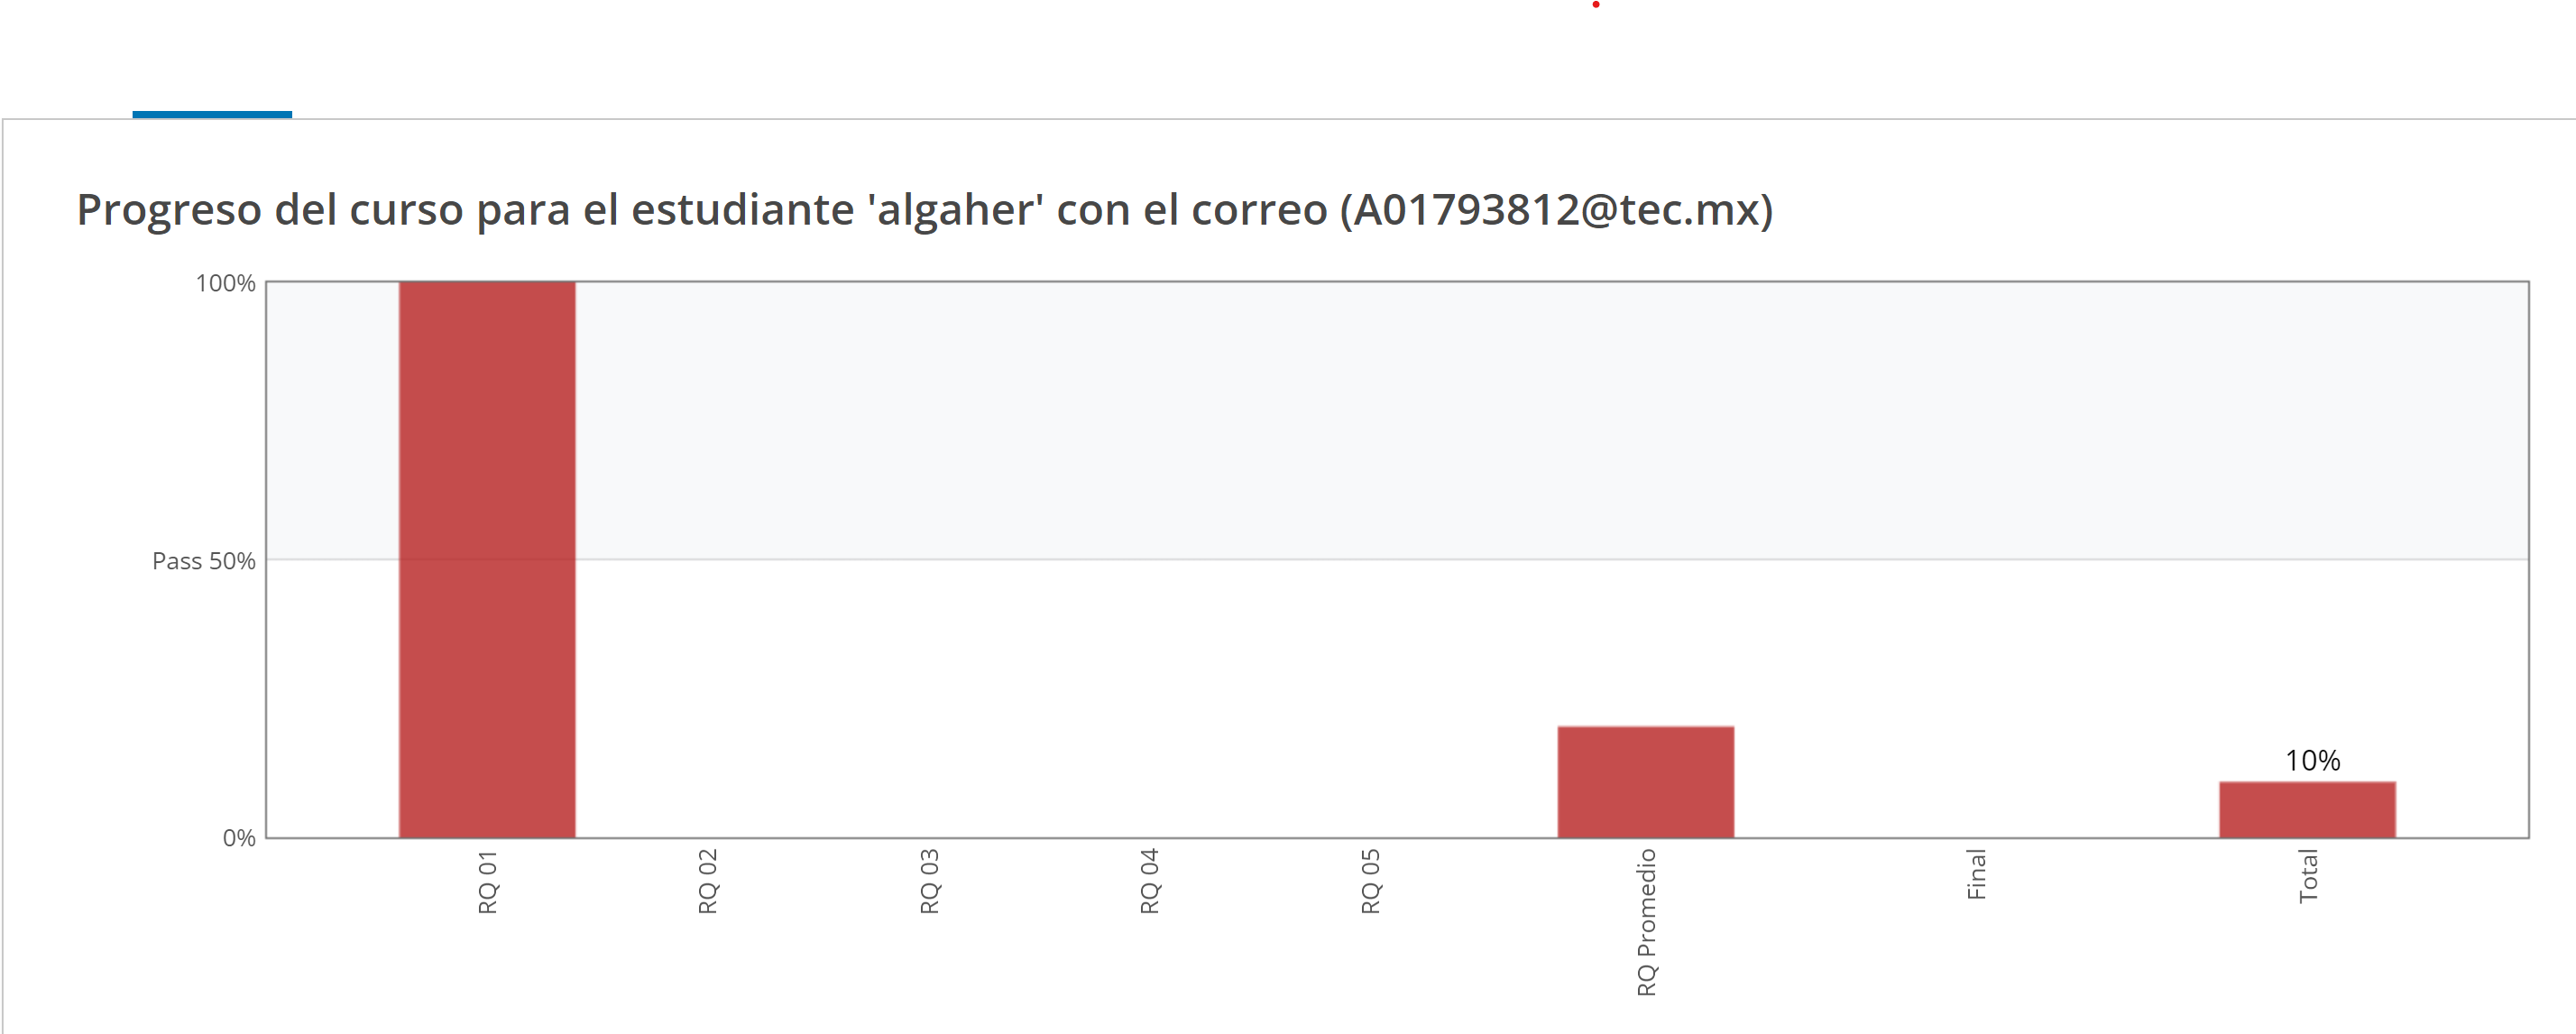